Import Library yang Dibutuhkan

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

load dataset

In [14]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

# Buat DataFrame dari data iris
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Simpan ke CSV di folder proyek
df.to_csv('iris_dataset.csv', index=False)

print("Dataset iris sudah disimpan sebagai iris_dataset.csv")


Dataset iris sudah disimpan sebagai iris_dataset.csv


Eksplorasi Data Sederhana

In [15]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['target_name'] = pd.Categorical.from_codes(iris.target, iris.target_names)

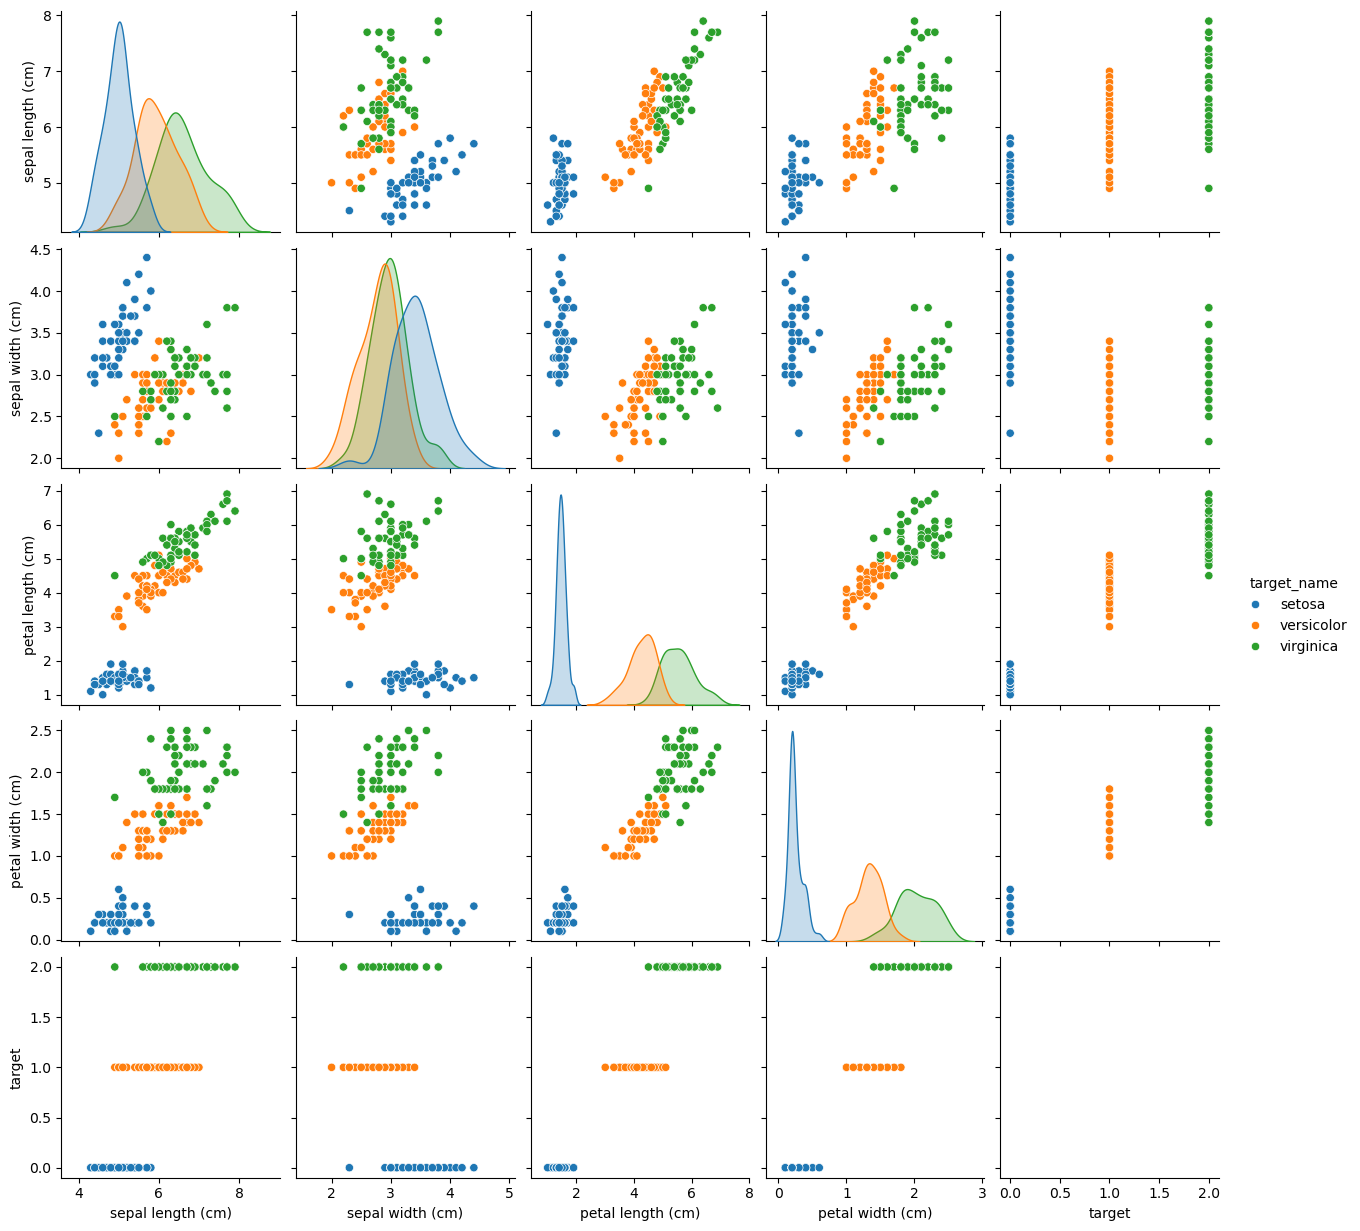

In [16]:
# Visualisasi sebaran fitur
sns.pairplot(df, hue='target_name')
plt.show()

Preprocessing Data

In [17]:
# Pisahkan fitur dan label
X = df[iris.feature_names].values
y = df['target'].values

# Split data ke training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Standardisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Model 1: K-Nearest Neighbors (KNN)

In [18]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print("Akurasi KNN:", accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

Akurasi KNN: 0.9333333333333333
[[10  0  0]
 [ 0 10  0]
 [ 0  2  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



Model 2: Decision Tree

In [19]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)

print("Akurasi Decision Tree:", accuracy_score(y_test, y_pred_tree))
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

Akurasi Decision Tree: 0.9333333333333333
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



Model 3: Naive Bayes

In [20]:
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

print("Akurasi Naive Bayes:", accuracy_score(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Akurasi Naive Bayes: 0.9666666666666667
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



Perbandingan Akurasi Model

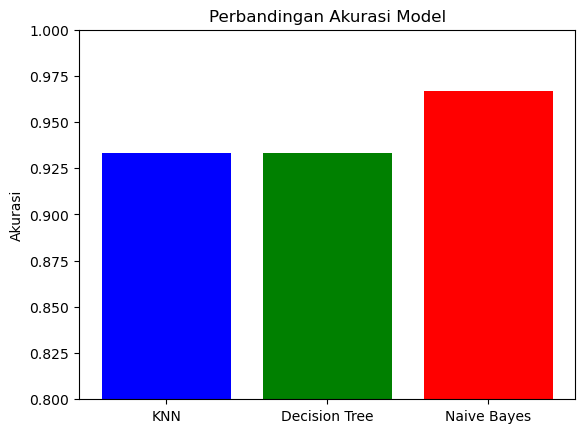

In [21]:
model_names = ['KNN', 'Decision Tree', 'Naive Bayes']
accuracies = [
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_tree),
    accuracy_score(y_test, y_pred_nb)
]

plt.bar(model_names, accuracies, color=['blue', 'green', 'red'])
plt.ylabel('Akurasi')
plt.title('Perbandingan Akurasi Model')
plt.ylim(0.8, 1.0)
plt.show()
